In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf


from PIL import Image,  ImageDraw, ImageFont

import seaborn as sns
import time
from tensorflow.keras.preprocessing import image
import cv2
import sys

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Docs_AI/GenderClassification/CustomCNNGenderClassification9649.h5')

In [ ]:
def GenderPrediction (imagePath):
  '''
  input : imagePath --> String
  output: img -> np array,
          gender --> String

  '''
  img = tf.keras.preprocessing.image.load_img(imagePath, target_size=(100,100))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  predictions = model.predict(img_batch)
  label = np.argmax(predictions)



  if label == 0:
    gender = 'female'
  else:
    gender = 'male'

  return img, gender


In [ ]:
def SearchForFaces(imagePath):

  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  faces = faceCascade.detectMultiScale(
      gray,
      scaleFactor=1.3,
      minNeighbors=3,
      minSize=(30, 30)
  )

  return faces

In [ ]:
def GenderClassificationSystem(imagePath):

  image = cv2.imread(imagePath)

  faces = SearchForFaces(imagePath)


  img_dict = {}


  if len(faces) != 0:
    print("[INFO] Found {0} Faces.".format(len(faces)))

    i = 0

    for (x, y, w, h) in faces:

        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_color = image[y:y + h, x:x + w]

        cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)


        img, gender = GenderPrediction (str(w) + str(h) + '_faces.jpg')

        img_dict[i] = (img,gender)


        i = i+1

    status = cv2.imwrite('faces_detected.jpg', image)
    print("Faces Detected: ")
    Detected_faces = Image.open("faces_detected.jpg")

    plt.imshow(Detected_faces)
    plt.axis('off')
    plt.show()

  else:
    img, gender = GenderPrediction (imagePath)

    img_dict[0] = (img,gender)


  return img_dict


[INFO] Found 1 Faces.
1/1 [==============================] - 0s 105ms/step
Faces Detected: 


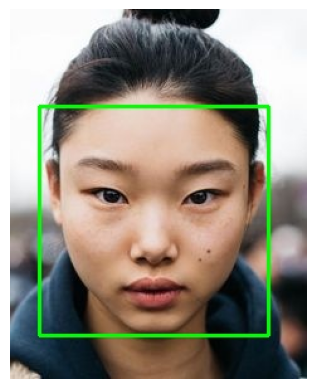

In [ ]:
img_dict = GenderClassificationSystem("/content/drive/MyDrive/Docs_AI/GenderClassification/DataForTesting/1.jpg")

male


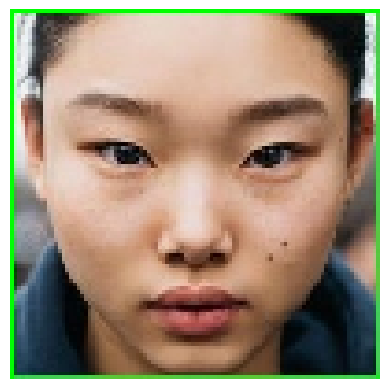

In [ ]:
for img, gender in img_dict.values():

  print (gender)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
im,gen = GenderPrediction ("/content/drive/MyDrive/Docs_AI/GenderClassification/DataForTesting/1.jpg")

1/1 [==============================] - 0s 42ms/step


In [ ]:
gen

'male'